# Budget App

<pre>
To-do:
    1.  Add fixed/floating variable functionality
    1.1 Have floating variables change automatically in response to adjustments
    1.2 Set up a buffer value such that the rest of the budget is always used up
    2.  Clean up data display
</pre>    

In [2]:
#Defining Functions

#federal taxes
def fedtax(pretax):
    if pretax<9526:
        return pretax*0.9
    elif 9525<pretax<38701:
        return pretax*.88
    elif 38700<pretax<82501:
        return pretax*.78
    elif 82500<pretax<157501:
        return pretax*.76
    elif pretax>157500:
        print('Go hire an accountant you rich asshole!')

#state tax
def statetax(postfed,pretax):
    state = input('Which state? (DC, MD, VA): ')
    if state not in ['DC','MD','VA']:
        print('State must be in the DMV')
        print('No state taxes applied')
        state = ''
    elif state == 'VA':
        if pretax>17000:
            return postfed-(.02*3000)-(.03*2000)-(.05*12000)-(.0575*(pretax-17000))
        elif 17001>pretax>5000:
            return postfed-(.02*3000)-(.03*2000)-(.05*12000)
        else:
            return postfed-(.02*3000)-(.03*2000)
    elif state == 'DC':
        if pretax<10001:
            return postfed-(.04*pretax)
        elif 10000<pretax<40001:
            return postfed-(.04*10000)-(.06*(pretax-10000))
        elif 40000<pretax<60001:
            return postfed-(.04*10000)-(.06*30000)-(.065*(pretax-40000))
        elif 60000<pretax<351000:
            return postfed-(.04*10000)-(.06*30000)-(.065*20000)-(0.85*(pretax-60000))
        else:
            return postfed-(.04*10000)-(.06*30000)-(.065*20000)-(0.85*290000)-(8.75*(pretax-350000))
    #MD tax estimate is very rough, incorporates the 3.2% Montgomery County tax
    elif state == 'MD':
        if pretax<100001:
            return postfed-(.07*pretax)
        else:
            return postfed-(.084*pretax)
        

#savings
def saver(net):
    def saverate(rate,net):
        if rate>0:
            return net*(rate/100)
        else:
            return 0
    sav = input('Will you save by % or $? ')
    if sav == '%':
        rate = int(input('What percent of [takehome] income will you save? '))
        savings = saverate(rate,net)
    elif sav=='$':
        amt = input('What amount do you want to save annually? $')
        savings = float(amt)
    net = net-savings
    monthly_budget['savings'] = savings/12
    annual_budget['savings'] = savings
    
#student loans
def loaner(net):
    payment = float(input('How much are you paying monthly toward student loans? $'))
    anloan = payment*12
    monthly_budget['student loans'] = payment
    annual_budget['student loans'] = anloan
    
#rent
def renter(net):
    check = input('Do you have a place to live? (Y/N) ')
    if check == 'Y':
        rent = float(input('How much do you pay monthly in rent? $'))*12
    elif check =='N':
        search = input('looking at rents by % or $? ')
        if search == '$':
            rent=float(input('What is the maximum monthly rent you are willing to pay? $'))*12
        elif search == '%':
            rrate=float(input('What percent of your income will you spend on rent? '))
            rent = net*(rrate/100)
    monthly_budget['rent'] = rent/12
    annual_budget['rent'] = rent
    return rent

#transit
def commute():
    fare = float(input('How much will it cost to tavel to/from work one-way? $'))
    transit=fare*524
    monthly_budget['transit'] = transit/12
    annual_budget['transit'] = transit
    
#food
def foodcost():
    week = float(input('How much do you spend on food per week? $'))
    month = week*4.34
    annual = month*12
    monthly_budget['food'] = month
    annual_budget['food'] = annual
    
#going out budget
def goingout():
    nights = int(input('How many nights a week will you go out? '))
    ano = float(input('How much do you spend on an average night out? $'))
    gb = nights*ano*4.34
    monthly_budget['going out'] = gb
    annual_budget['going out'] = gb*12

#add other costs
def addcost():
    mc = True
    while mc == True:
        x = input('Do you have additional costs?(Y/N) ')
        if x == 'N':
            mc = False
        elif x == 'Y':
            name = input('name of cost: ')
            freq = input('frequency(day/week/month/year): ')
            price = float(input('cost: $'))
            
            #leaves open possibility of parametric costs
            vari = input('hard cost or variable? ')

            if name in monthly_budget:
                print('Must use a unique cost name!')
            else:
                if freq == 'day':
                    x=input('Workdays only?(Y/N) ')
                    if x == 'Y':
                        cost = price*262
                    elif x == 'N':
                        cost = price*365
                elif freq == 'week':
                    cost = price*52
                elif freq == 'month':
                    cost = price*12
                elif freq == 'year':
                    cost = price
                monthly_budget[name] = cost/12
                annual_budget[name] = cost
                
#adjustment functions for both monthly and annual costs
def adjust_annual():
    for i in annual_budget.items():
        print(i)
    select = input('Which will you adjust? ')
    if select in annual_budget.keys():
        nv = float(input('new value = $'))
        monthly_budget[select] = nv/12
        annual_budget[select] = nv
    
def adjust_monthly():
    for i in monthly_budget.items():
        print(i)
    select = input('Which will you adjust? ')
    if select in monthly_budget.keys():
        nv = float(input('new value = $'))
        monthly_budget[select] = nv
        annual_budget[select] = nv*12

In [3]:
#adjustment functions for both monthly and annual costs
def adjust_annual():
    for i in annual_budget.items():
        print(i)
    select = input('Which will you adjust? ')
    if select in annual_budget.keys():
        nv = float(input('new value = $'))
        monthly_budget[select] = nv/12
        annual_budget[select] = nv
    
def adjust_monthly():
    for i in monthly_budget.items():
        print(i)
    select = input('Which will you adjust? ')
    if select in monthly_budget.keys():
        nv = float(input('new value = $'))
        monthly_budget[select] = nv
        annual_budget[select] = nv*12

In [4]:
monthly_budget = {}
annual_budget = {}

#salary and taxes
gross = int(input('Gross salary: $'))
postfed=fedtax(gross)
net=statetax(postfed,gross)

#fed and state are actual amount paid in each tax
fed=gross-postfed
state=postfed-net
takehome=net

#savings
saver(net)

#student loans
loaner(takehome)

#rent
rent = renter(takehome)

#transit
commute()

#food
foodcost()

#going out budget
goingout()

Gross salary: $65000
Which state? (DC, MD, VA): VA
Will you save by % or $? $
What amount do you want to save annually? $6000
How much are you paying monthly toward student loans? $260
Do you have a place to live? (Y/N) N
looking at rents by % or $? $
What is the maximum monthly rent you are willing to pay? $1500
How much will it cost to tavel to/from work one-way? $7
How much do you spend on food per week? $100
How many nights a week will you go out? 3
How much do you spend on an average night out? $35


In [ ]:
#additional costs
addcost()

In [5]:
print('Annual: ')
shmoney = takehome
for i in annual_budget.values():
    shmoney=shmoney-i
print('takehome = '+str(takehome))
for key,value in annual_budget.items():
    value=round(value,2)
    print(str(key)+' = '+str(value))
print('leftover money = '+str(round(shmoney,2)))

Annual: 
takehome = 47220.0
savings = 6000.0
student loans = 3120.0
rent = 18000.0
transit = 3668.0
food = 5208.0
going out = 5468.4
leftover money = 5755.6


In [6]:
print('Monthly:')
shmoney = takehome
for i in annual_budget.values():
    shmoney=shmoney-i
print('takehome = '+str(round(takehome/12,2)))
for key,value in monthly_budget.items():
    value=round(value,2)
    print(str(key)+' = '+str(value))
print('')
print('leftover money = '+str(round(shmoney/12,2)))

Monthly:
takehome = 3935.0
savings = 500.0
student loans = 260.0
rent = 1500.0
transit = 305.67
food = 434.0
going out = 455.7

leftover money = 479.63


In [ ]:
adjust_monthly()

In [ ]:
adjust_annual()

<pre>
1. create a pool of variable cost money
2. record percentage of pool per varcost
3. when varcost is adjusted, all other varcosts increase in proportion to percent of pool (adjusted cost becomes fixed at a new ratio)
---create an option for this
---no data for this calculation needs to be displayed

final step: record percent of total costs
</pre>

In [16]:
#breaks down costs by % of gross salary
grosscosts = {}
grosscosts['federal_taxes']=round((fed/gross)*100,2)
grosscosts['state_taxes']=round((state/gross)*100,2)

for key,value in annual_budget.items():
    grosscosts[key]=round((value/gross)*100,2)
grosscosts['leftover money']=round((shmoney/gross)*100,2)
    
for x,y in grosscosts.items():
    print(str(x)+' : '+str(y)+'%')

federal_taxes : 22.0%
state_taxes : 5.35%
savings : 9.23%
student loans : 4.8%
rent : 27.69%
transit : 5.64%
food : 8.01%
going out : 8.41%
leftover money : 8.85%


In [17]:
#breaks down costs by % of takehome (after taxes)
takehomecosts = {}
for key,value in annual_budget.items():
    takehomecosts[key]=round((value/takehome)*100,2)
takehomecosts['leftover money']=round((shmoney/takehome)*100,2)
for x,y in takehomecosts.items():
    print(str(x)+' : '+str(y)+'%')

savings : 12.71%
student loans : 6.61%
rent : 38.12%
transit : 7.77%
food : 11.03%
going out : 11.58%
leftover money : 12.19%


In [34]:
#pie chart maker
#argument is a dictionary
def piemaker(dt):  
    import matplotlib.pyplot as plt
    # Pie chart
    labels = []
    for i in dt.keys():
        labels.append(i)
    sizes = []
    for value in dt.values():
        sizes.append(value)
    exp = []
    for label in labels:
        exp.append(.06)

    #colors
    #colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

    fig1, ax1 = plt.subplots()
    patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=exp)
    for text in texts:
        text.set_color('grey')
    for autotext in autotexts:
        autotext.set_color('black')
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()

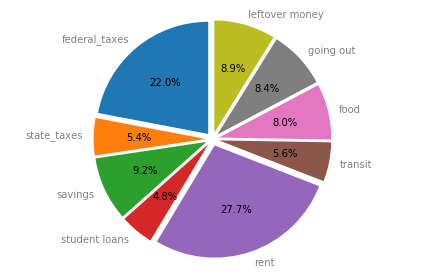

In [35]:
piemaker(grosscosts)

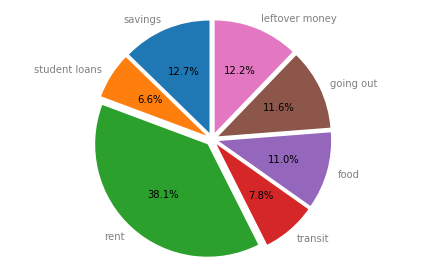

In [36]:
piemaker(takehomecosts)